In [1]:
#Setup packages etc
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['CUDA_VISIBLE_DEVICES']='3'
import pickle
import bz2
import itertools
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from tools.detector import Detector
from tools.readpandas import Get_Momentum

#from trackml.dataset import load_event, load_dataset
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.models import load_model
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#############################################################
###                                                       ###
###           my functions                                ### 
############################################################
#convert truth direction to local coordinate frame, used to prepare training data
detector = Detector('training_data/detectors.csv')

def truthmom_to_uvw(a):
    b = detector.GlobalToLocalMom(a[1], a[2], a[3], volid, a[4], a[5])
    norm = np.linalg.norm(b)
    return [b[0], b[1], b[2]]/norm


######################
## given a NN predict the directions
#######################
def my_norm(x):
    return (x/np.linalg.norm(x,axis=1)[:,np.newaxis])

def predicteddirections(NNmodel, data):
    temp = NNmodel.predict(data)
    temp = my_norm(temp)
    return temp

##################
### plot an individual hit (jj = 0,1 for two choices of where to start vector arrows--head or tail)
###################
def plot_a_hit(hit_to_plot, NNmodel,jj):
    lw=1
    hitpattern = hit_to_plot[-8:]
    print(hitpattern)
    truedirection = truthmom_to_uvw(hit_to_plot)
    predicteddirection = predicteddirections(NNmodel, np.reshape(hitpattern,(1,8)))[0]
    print(predicteddirection)
    xs=np.array([hitpattern[0],hitpattern[3]])  #x vals of hit
    ys=np.array([hitpattern[1],hitpattern[4]]) #y vals of hit
    ss = np.array([50*hitpattern[2]/(hitpattern[2] + hitpattern[5]),50*hitpattern[5]/(hitpattern[2] + hitpattern[5])])
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(xs, ys, s=ss)
    line=matplotlib.lines.Line2D([xs[0],xs[0]+truedirection[0]],[ys[0],ys[0]+truedirection[1]])
    ax.add_line(line)
    veclength = 1*np.sqrt((xs.max() - xs.min())**2 + (ys.max() - ys.min())**2)
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_zlim([-10,10])
    ax.quiver(xs[jj], ys[jj], 0, truedirection[0], truedirection[1], truedirection[2], length=veclength, normalize=True, color='g',linewidth=lw)
    ax.quiver(xs[jj], ys[jj], 0, predicteddirection[0], predicteddirection[1], predicteddirection[2], length=veclength, normalize=True, color='r',linestyle="--",linewidth=lw)
    ax.scatter(xs, ys, np.zeros(2), s=ss)
    fig.show()
    print("vetors (true, predicted)\n", truedirection,"\n", predicteddirection)
#    print("cosine of angle between = ",csine,"   angle = ", np.arccos(csine)*180/np.pi," degrees")
    return

Using TensorFlow backend.
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/shared_env/l

In [2]:
events = pd.read_hdf('events_100_table.h5','events',where=('volume_id == 8 & particle_id != 0'))

KeyboardInterrupt: 

In [3]:
x = events[['x','y','z','ch0_i','ch1_i','charge_i','ch0_f','ch1_f','charge_f','nch0','nch1']]
event_ids = np.unique(events['event_id'])

In [4]:
y = []
for event_id in event_ids:
    print(event_id)
    event = events[events['event_id'] == str(event_id)]
    y.append(detector.GlobalToLocalMomBatchNorm(event)[['pu','pv','pw']])
y = np.concatenate(y)

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099


In [5]:
events = pd.read_hdf('events_200_table.h5','events',where=('volume_id == 8 & particle_id != 0'))
x2 = events[['x','y','z','ch0_i','ch1_i','charge_i','ch0_f','ch1_f','charge_f','nch0','nch1']]
event_ids = np.unique(events['event_id'])
y2 = []
for event_id in event_ids:
    print(event_id)
    event = events[events['event_id'] == str(event_id)]
    y2.append(detector.GlobalToLocalMomBatchNorm(event)[['pu','pv','pw']])
y2 = np.concatenate(y2)

1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199


In [6]:
events = pd.read_hdf('events_300_table.h5','events',where=('volume_id == 8 & particle_id != 0'))
x3 = events[['x','y','z','ch0_i','ch1_i','charge_i','ch0_f','ch1_f','charge_f','nch0','nch1']]
event_ids = np.unique(events['event_id'])
y3 = []
for event_id in event_ids:
    print(event_id)
    event = events[events['event_id'] == str(event_id)]
    y3.append(detector.GlobalToLocalMomBatchNorm(event)[['pu','pv','pw']])
y3 = np.concatenate(y3)

1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299


In [7]:
x = np.concatenate([x,x2,x3])
y = np.concatenate([y,y2,y3])

In [8]:
print(len(x),len(y))

(7222521, 7222521)


In [10]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25, random_state=67)

In [11]:
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

(5416890, 5416890)
(1805631, 1805631)


In [3]:
x = np.load('x_array.npy')
y = np.load('y_array.npy')

In [4]:
x_xyz = x[:,:3]
x_cluster = x[:,3:]

In [5]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25, random_state=67)
x_xyz_train, x_xyz_test, y_train, y_test = train_test_split (x_xyz, y, test_size=0.25, random_state=67)
x_cluster_train, x_cluster_test, y_train, y_test = train_test_split (x_cluster, y, test_size=0.25, random_state=67)

In [25]:
NNmodel_CP = Sequential()
NNmodel_CP.add(Dense(units=256, input_dim=x_cluster_train.shape[1]))
NNmodel_CP.add(Activation('relu'))
NNmodel_CP.add(Dense(units=128))
NNmodel_CP.add(Activation('relu'))
NNmodel_CP.add(Dense(units=64))
NNmodel_CP.add(Activation('relu'))
NNmodel_CP.add(Dense(units=32))
NNmodel_CP.add(Activation('relu'))
NNmodel_CP.add(Dense(units=y_train.shape[1]))       
NNmodel_CP.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
NNmodel_CP.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 256)               2304      
_________________________________________________________________
activation_30 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_31 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_32 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
__________

In [26]:
num_epoch=200
NNmodel_CP_hist=NNmodel_CP.fit(x_cluster_train, y_train, epochs=num_epoch, batch_size=2048, verbose=1, validation_data=[x_cluster_test,y_test])

Train on 5416890 samples, validate on 1805631 samples
Epoch 1/200
5416890/5416890 [==============================] - 21s 4us/step - loss: 0.4097 - acc: 0.6948 - val_loss: 0.1668 - val_acc: 0.7175
Epoch 2/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.1986 - acc: 0.7098 - val_loss: 0.1756 - val_acc: 0.6950
Epoch 3/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.1855 - acc: 0.7053 - val_loss: 0.2001 - val_acc: 0.6927
Epoch 4/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.1960 - acc: 0.6994 - val_loss: 0.2485 - val_acc: 0.6891
Epoch 5/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.2004 - acc: 0.6951 - val_loss: 0.1777 - val_acc: 0.6964
Epoch 6/200
5416890/5416890 [==============================] - 19s 3us/step - loss: 0.1833 - acc: 0.7288 - val_loss: 0.1344 - val_acc: 0.7700
Epoch 7/200
5416890/5416890 [==============================] - 18s 3us/step - loss: 0.1116 - a

Epoch 58/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0786 - acc: 0.8770 - val_loss: 0.2096 - val_acc: 0.6892
Epoch 59/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.1365 - acc: 0.7903 - val_loss: 0.0785 - val_acc: 0.8836
Epoch 60/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0859 - acc: 0.8657 - val_loss: 0.0712 - val_acc: 0.8864
Epoch 61/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0936 - acc: 0.8596 - val_loss: 0.0757 - val_acc: 0.8849
Epoch 62/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0956 - acc: 0.8510 - val_loss: 0.0718 - val_acc: 0.8854
Epoch 63/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0893 - acc: 0.8640 - val_loss: 0.0740 - val_acc: 0.8847
Epoch 64/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0828 - acc: 0.8725 - val_loss: 0.0709 - val_acc: 0.8881

Epoch 172/200
5416890/5416890 [==============================] - 19s 3us/step - loss: 0.0794 - acc: 0.8743 - val_loss: 0.0710 - val_acc: 0.8873
Epoch 173/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0752 - acc: 0.8813 - val_loss: 0.0708 - val_acc: 0.8877
Epoch 174/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0771 - acc: 0.8784 - val_loss: 0.0712 - val_acc: 0.8846
Epoch 175/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0748 - acc: 0.8839 - val_loss: 0.0709 - val_acc: 0.8901
Epoch 176/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0808 - acc: 0.8784 - val_loss: 0.0719 - val_acc: 0.8881
Epoch 177/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0796 - acc: 0.8799 - val_loss: 0.0718 - val_acc: 0.8883
Epoch 178/200
5416890/5416890 [==============================] - 20s 4us/step - loss: 0.0759 - acc: 0.8830 - val_loss: 0.0762 - val_acc:

In [ ]:
NNmodel_CP.save('trained_parameters/Direction_predictor_cluster_200_CP.h5')

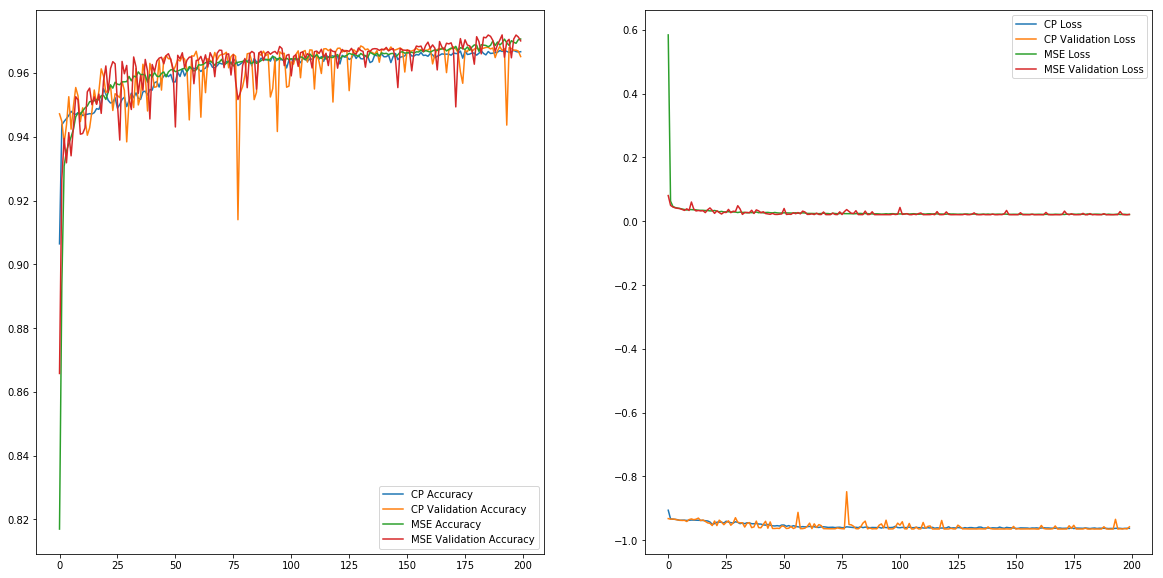

In [14]:
# accuracy etc
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.plot(NNmodel_CP_hist.history['acc'], label = 'CP Accuracy')
ax.plot(NNmodel_CP_hist.history['val_acc'], label = 'CP Validation Accuracy')
ax.plot(NNmodel_MSE_hist.history['acc'], label = 'MSE Accuracy')
ax.plot(NNmodel_MSE_hist.history['val_acc'], label = 'MSE Validation Accuracy')
ax.legend()
ax2.set_yscale('linear')
ax2.set_xscale('linear')
ax2.plot(NNmodel_CP_hist.history['loss'], label = 'CP Loss')
ax2.plot(NNmodel_CP_hist.history['val_loss'], label = 'CP Validation Loss')
ax2.plot(NNmodel_MSE_hist.history['loss'], label = 'MSE Loss')
ax2.plot(NNmodel_MSE_hist.history['val_loss'], label = 'MSE Validation Loss')
ax2.legend()

(-0.9999990214882016, 1.000000102522929)
(-0.999998033631035, 1.0000000580406148)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arccos


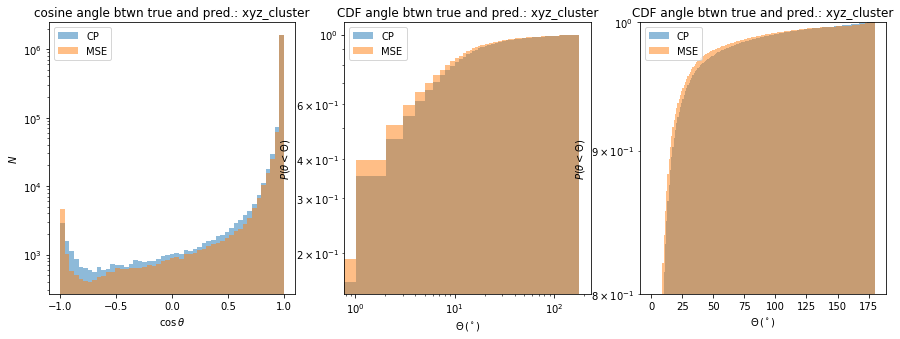

In [20]:
analysis_choice='xyz_cluster'

#(cosine of) angle between truth and prediction
predicteddirection_CP = predicteddirections(NNmodel_CP, x_test)
predicteddirection_MSE = predicteddirections(NNmodel_MSE, x_test)
cosines_CP=np.sum(predicteddirection_CP*y_test,axis=1)
cosines_MSE=np.sum(predicteddirection_MSE*y_test,axis=1)
print(min(cosines_CP), max(cosines_CP))
print(min(cosines_MSE), max(cosines_MSE))
fig, [ax1, ax2, ax3] = plt.subplots(1,3,figsize=(15,5))

ax1.hist(cosines_CP,bins=np.linspace(-1,1,50),alpha=0.5, label = 'CP')
ax1.hist(cosines_MSE,bins=np.linspace(-1,1,50),alpha=0.5, label = 'MSE')
ax1.set_yscale("log")
#ax2.set_ylim([0.8,1])
ax1.set_title("cosine angle btwn true and pred.: " + analysis_choice)
ax1.set_xlabel(r"$\cos\, \theta$")
ax1.set_ylabel(r"$N$")
ax1.legend()
ax2.hist(np.arccos(cosines_CP)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = 'CP')
ax2.hist(np.arccos(cosines_MSE)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = 'MSE')
ax2.set_yscale("log")
ax2.set_xscale("log")
#ax2.set_ylim([0.8,1])
ax2.set_xlabel(r"$\Theta\, (^\circ)$")
ax2.set_ylabel(r"$P(\theta < \Theta)$")
ax2.set_title("CDF angle btwn true and pred.: " + analysis_choice)
ax2.legend()
(nCP,binsCP,patchesCP) = ax3.hist(np.arccos(cosines_CP)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = 'CP')
(nMSE,binsMSE,patchesMSE) =ax3.hist(np.arccos(cosines_MSE)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = 'MSE')
ax3.set_yscale("log")
ax3.set_ylim([0.8,1])
ax3.set_xlabel(r"$\Theta\, (^\circ)$")
ax3.set_ylabel(r"$P(\theta < \Theta)$")
ax3.set_title("CDF angle btwn true and pred.: " + analysis_choice)
ax3.legend()

(-0.9999990214882016, 1.000000102522929)
(-0.999998033631035, 1.0000000580406148)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in arccos


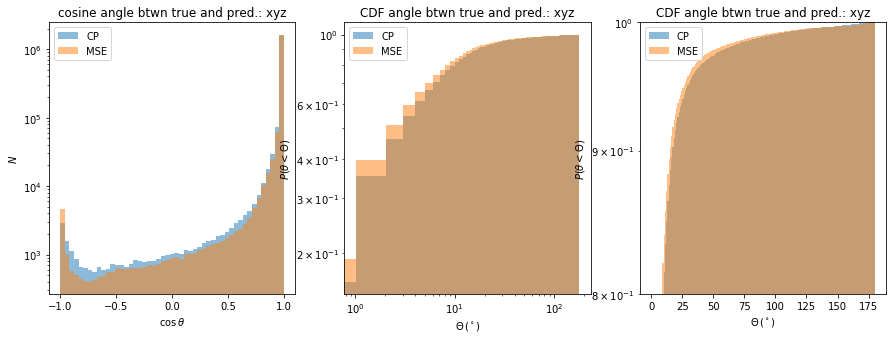

In [22]:
predicteddirection_CP = predicteddirections(NNmodel_CP, x_test)
predicteddirection_MSE = predicteddirections(NNmodel_MSE, x_test)
cosines_CP=np.sum(predicteddirection_CP*y_test,axis=1)
cosines_MSE=np.sum(predicteddirection_MSE*y_test,axis=1)
print(min(cosines_CP), max(cosines_CP))
print(min(cosines_MSE), max(cosines_MSE))
fig, [ax1, ax2, ax3] = plt.subplots(1,3,figsize=(15,5))

ax1.hist(cosines_CP,bins=np.linspace(-1,1,50),alpha=0.5, label = 'CP')
ax1.hist(cosines_MSE,bins=np.linspace(-1,1,50),alpha=0.5, label = 'MSE')
ax1.set_yscale("log")
#ax2.set_ylim([0.8,1])
ax1.set_title("cosine angle btwn true and pred.: xyz")
ax1.set_xlabel(r"$\cos\, \theta$")
ax1.set_ylabel(r"$N$")
ax1.legend()
ax2.hist(np.arccos(cosines_CP)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = 'CP')
ax2.hist(np.arccos(cosines_MSE)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = 'MSE')
ax2.set_yscale("log")
ax2.set_xscale("log")
#ax2.set_ylim([0.8,1])
ax2.set_xlabel(r"$\Theta\, (^\circ)$")
ax2.set_ylabel(r"$P(\theta < \Theta)$")
ax2.set_title("CDF angle btwn true and pred.: xyz")
ax2.legend()
(nCP,binsCP,patchesCP) = ax3.hist(np.arccos(cosines_CP)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = 'CP')
(nMSE,binsMSE,patchesMSE) =ax3.hist(np.arccos(cosines_MSE)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = 'MSE')
ax3.set_yscale("log")
ax3.set_ylim([0.8,1])
ax3.set_xlabel(r"$\Theta\, (^\circ)$")
ax3.set_ylabel(r"$P(\theta < \Theta)$")
ax3.set_title("CDF angle btwn true and pred.: xyz")
ax3.legend()

In [35]:
def make_plots(models, test, mode, axes, color):
    predicteddirection_CP = predicteddirections(models[0], test)
    predicteddirection_MSE = predicteddirections(models[1], test)
    cosines_CP=np.sum(predicteddirection_CP*y_test,axis=1)
    cosines_MSE=np.sum(predicteddirection_MSE*y_test,axis=1)
    
    labels = ['CP - {}'.format(mode),
              'MSE - {}'.format(mode)]
    
    axes[0].hist(cosines_CP,bins=np.linspace(-1,1,50),alpha=0.5, label = labels[0], color=color, ls='-')
    axes[0].hist(cosines_MSE,bins=np.linspace(-1,1,50),alpha=0.5, label = labels[1], color=color, ls='--')
    axes[1].hist(np.arccos(cosines_CP)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = labels[0], color=color, ls='-')
    axes[1].hist(np.arccos(cosines_MSE)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = labels[1], color=color, ls='--')
    (nCP,binsCP,patchesCP) = axes[2].hist(np.arccos(cosines_CP)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = labels[0], color=color, ls='-')
    (nMSE,binsMSE,patchesMSE) =axes[2].hist(np.arccos(cosines_MSE)*180./np.pi,bins=np.linspace(0,180,180),alpha=0.5,cumulative=True,density=True, label = labels[1], color=color, ls='--')
    
    fracCP=[min(1.0,np.radians(i)*40./455) * np.radians(i)/2 for i in binsCP] #distance between layers is 40mm, length is 455mm
    fracCP=[0.5*(fracCP[i]+fracCP[i+1]) for i in range(len(fracCP)-1)]
    probCP=nCP
    fracMSE=[min(1.0,np.radians(i)*40./455) * np.radians(i)/2 for i in binsMSE]
    fracMSE=[0.5*(fracMSE[i]+fracMSE[i+1]) for i in range(len(fracMSE)-1)]
    probMSE=nMSE
    axes[3].plot(fracCP,probCP,label=labels[0], color=color, ls='-')
    axes[3].plot(fracMSE,probMSE,label=labels[1], color=color, ls='--')
    
    return axes

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arccos
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in arccos
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in arccos
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app


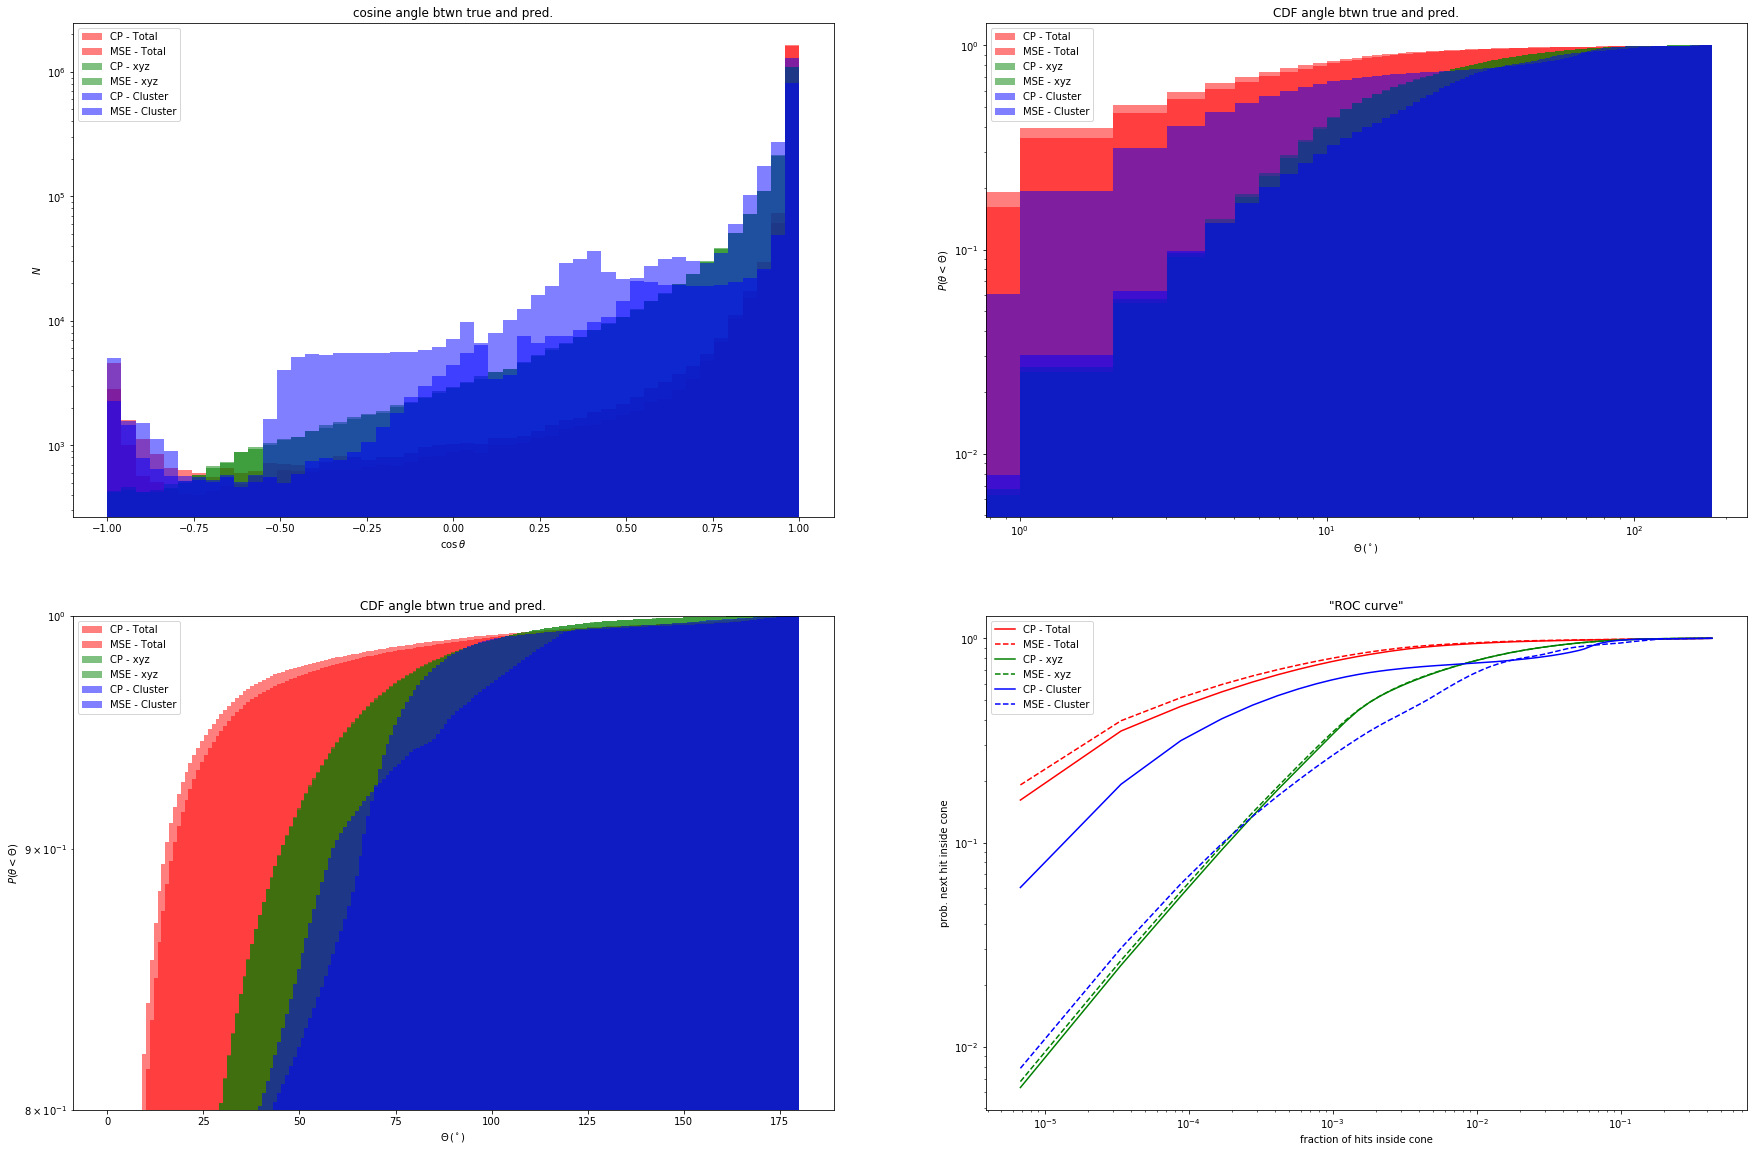

In [38]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2,figsize=(30,20))
axes = make_plots([NNmodel_CP, NNmodel_MSE], x_test, 'Total', [ax1, ax2, ax3, ax4], 'red')
axes = make_plots([NNmodel_CP_xyz, NNmodel_MSE_xyz], x_xyz_test, 'xyz', axes, 'green')
axes = make_plots([NNmodel_CP_cluster, NNmodel_MSE_cluster], x_cluster_test, 'Cluster', axes, 'blue')

axes[0].set_yscale("log")
axes[0].set_title("cosine angle btwn true and pred.")
axes[0].set_xlabel(r"$\cos\, \theta$")
axes[0].set_ylabel(r"$N$")
axes[0].legend()

axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_xlabel(r"$\Theta\, (^\circ)$")
axes[1].set_ylabel(r"$P(\theta < \Theta)$")
axes[1].set_title("CDF angle btwn true and pred.")
axes[1].legend()

axes[2].set_yscale("log")
axes[2].set_ylim([0.8,1])
axes[2].set_xlabel(r"$\Theta\, (^\circ)$")
axes[2].set_ylabel(r"$P(\theta < \Theta)$")
axes[2].set_title("CDF angle btwn true and pred.")
axes[2].legend()

axes[3].set_ylabel("prob. next hit inside cone")
axes[3].set_xlabel("fraction of hits inside cone")
axes[3].set_xscale("log")
axes[3].set_yscale("log")
axes[3].set_title("\"ROC curve\"")
axes[3].legend()

plt.show()

(-0.9999990214882016, 1.000000102522929)
(-0.999998033631035, 1.0000000580406148)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in arccos
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in arccos


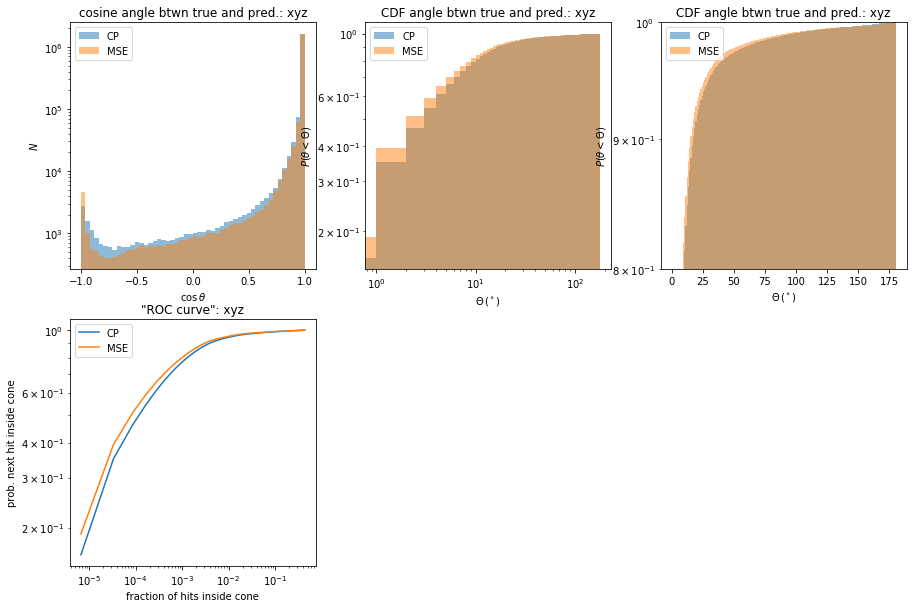

In [24]:
print(min(cosines_CP), max(cosines_CP))
print(min(cosines_MSE), max(cosines_MSE))
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,3,1)
ax1.hist(cosines_CP,bins=np.linspace(-1,1,51),alpha=0.5, label = 'CP')
ax1.hist(cosines_MSE,bins=np.linspace(-1,1,51),alpha=0.5, label = 'MSE')
ax1.set_yscale("log")
#ax2.set_ylim([0.8,1])
ax1.set_title("cosine angle btwn true and pred.: xyz")
ax1.set_xlabel(r"$\cos\, \theta$")
ax1.set_ylabel(r"$N$")
ax1.legend()
ax2 = fig.add_subplot(2,3,2)
ax2.hist(np.arccos(cosines_CP)*180./np.pi,bins=np.linspace(0,180,181),alpha=0.5,cumulative=True,density=True, label = 'CP')
ax2.hist(np.arccos(cosines_MSE)*180./np.pi,bins=np.linspace(0,180,181),alpha=0.5,cumulative=True,density=True, label = 'MSE')
ax2.set_yscale("log")
ax2.set_xscale("log")
#ax2.set_ylim([0.8,1])
ax2.set_xlabel(r"$\Theta\, (^\circ)$")
ax2.set_ylabel(r"$P(\theta < \Theta)$")
ax2.set_title("CDF angle btwn true and pred.: xyz")
ax2.legend()
ax3 = fig.add_subplot(2,3,3)
(nCP,binsCP,patchesCP) = ax3.hist(np.arccos(cosines_CP)*180./np.pi,bins=np.linspace(0,180,181),alpha=0.5,cumulative=True,density=True, label = 'CP')
(nMSE,binsMSE,patchesMSE) =ax3.hist(np.arccos(cosines_MSE)*180./np.pi,bins=np.linspace(0,180,181),alpha=0.5,cumulative=True,density=True, label = 'MSE')
ax3.set_yscale("log")
ax3.set_ylim([0.8,1])
ax3.set_xlabel(r"$\Theta\, (^\circ)$")
ax3.set_ylabel(r"$P(\theta < \Theta)$")
ax3.set_title("CDF angle btwn true and pred.: xyz")
ax3.legend()
#ROC curve, assuming hits uniformly distributed
ax4 = fig.add_subplot(2,3,4)
fracCP=[min(1.0,np.radians(i)*40./455) * np.radians(i)/2 for i in binsCP] #distance between layers is 40mm, length is 455mm
fracCP=[0.5*(fracCP[i]+fracCP[i+1]) for i in range(len(fracCP)-1)]
probCP=nCP
fracMSE=[min(1.0,np.radians(i)*40./455) * np.radians(i)/2 for i in binsMSE]
fracMSE=[0.5*(fracMSE[i]+fracMSE[i+1]) for i in range(len(fracMSE)-1)]
probMSE=nMSE
ax4.plot(fracCP,probCP,label="CP")
ax4.plot(fracMSE,probMSE,label="MSE")
ax4.set_ylabel("prob. next hit inside cone")
ax4.set_xlabel("fraction of hits inside cone")
ax4.set_xscale("log")
ax4.set_yscale("log")
#ax4.set_xlim([0.0001,1])
#ax4.set_ylim([0.3,1])
ax4.set_title("\"ROC curve\": xyz")
ax4.legend()